In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from diffpy.utils.parsers.loaddata import loadData

In [2]:
data_path = Path.cwd() / "data"
if not data_path.exists():
    data_path.mkdir()
    sys.exit(f"\n{80*'-'}\nA folder called '{data_path.name}' has been created."
             f"\nPlease put your data files there and rerun the cell."
             f"\n{80*'-'}")
data_files = list(data_path.glob("*.*"))
if len(data_files) == 0:
    sys.exit(f"\n{80*'-'}\nNo files were found in the '{data_path.name}' "
             f"folder.\nPlease put your data files there and rerun the cell."
             f"\n{80*'-'}")

In [62]:
D_PLOT_SETTINGS = dict(figsize=(8, 6),
                       dpi=300,
                       fontsize=dict(labels=20, ticklabels=14),
                       xlabel="index",
                       ylabel=r"$x$",
                       cbarlabel=r"y",
                       cmap="viridis",
                       )

In [63]:
def plot(x, array, d, name, plot_paths):
    fig, ax = plt.subplots(figsize=d["figsize"])
    im = ax.imshow(array, 
                   aspect="auto", 
                   extent=(0,
                           array.shape[1],
                           np.amax(x),
                           np.amin(x),
                           ),
                   cmap=d["cmap"],
                   )
    ax.set_xlabel(d["xlabel"], fontsize=d["fontsize"]["labels"])
    ax.set_ylabel(d["ylabel"], fontsize=d["fontsize"]["labels"])
    ax.tick_params(axis="x",
                   which="both",
                   bottom=True,
                   top=True,
                   labeltop=True,
                   labelbottom=False,
                   direction="inout",
                   labelsize=d["fontsize"]["ticklabels"],
                   )
    ax.tick_params(axis="y",
                   which="both",
                   left=True,
                   right=True,
                   labelleft=True,
                   labelright=False,
                   direction="inout",
                   labelsize=d["fontsize"]["ticklabels"],
                   )
    ax.xaxis.set_label_position("top")
    ax.minorticks_on()
    cb = plt.colorbar(im)
    cb.set_label(d["cbarlabel"], size=d["fontsize"]["labels"])
    for p in plot_paths:
        print(f"\t{p.name}")
        plt.savefig(p / f"{name}.{p.name}", bbox_inches="tight", dpi=d["dpi"])
    plt.show()

    return None

In [64]:
plot_folders = ["png",
                # "pdf",
                # "svg",
                ]
plot_paths = [Path.cwd() / folder for folder in plot_folders]
for p in plot_paths:
    if not p.exists():
        p.mkdir()

--------------------------------------------------------------------------------
Loading data from files...
	0	00_B3_Bronze-3nm_DD155_0_115-118_sum_esd_norm.chi
	1	01_B3_Bronze-3nm_DD155_1_139-142_sum_esd_norm.chi
	2	02_B3_Bronze-3nm_DD155_2_163-166_sum_esd_norm.chi
Done loading data.
Making overview plot...
	png


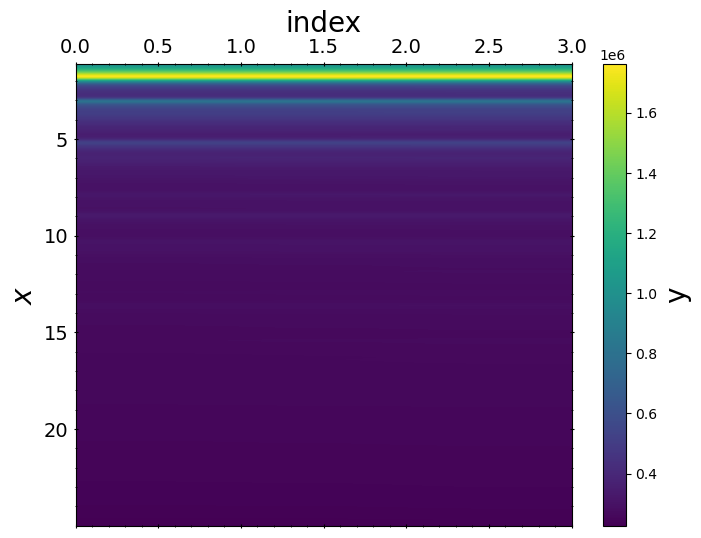

Done plotting. Please see the ['png'] folders.
--------------------------------------------------------------------------------


In [65]:
print(f"{80*'-'}\nLoading data from files...")
for i, f in enumerate(data_files):
    print(f"\t{i}\t{f.name}")
    data = loadData(f)
    if i == 0:
        x, array = data[:, 0], data[:, 1]
    else:
        array = np.column_stack((array, data[:, 1]))
array = np.array(array)
print(f"Done loading data.\nMaking overview plot...")
plot(x, array, D_PLOT_SETTINGS, "xy_overview", plot_paths)
print(f"Done plotting. Please see the {plot_folders} folders.\n{80*'-'}")